In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv("/content/Churn Modeling.csv")

In [3]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
ds.shape

(10000, 14)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
ds.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
ds.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


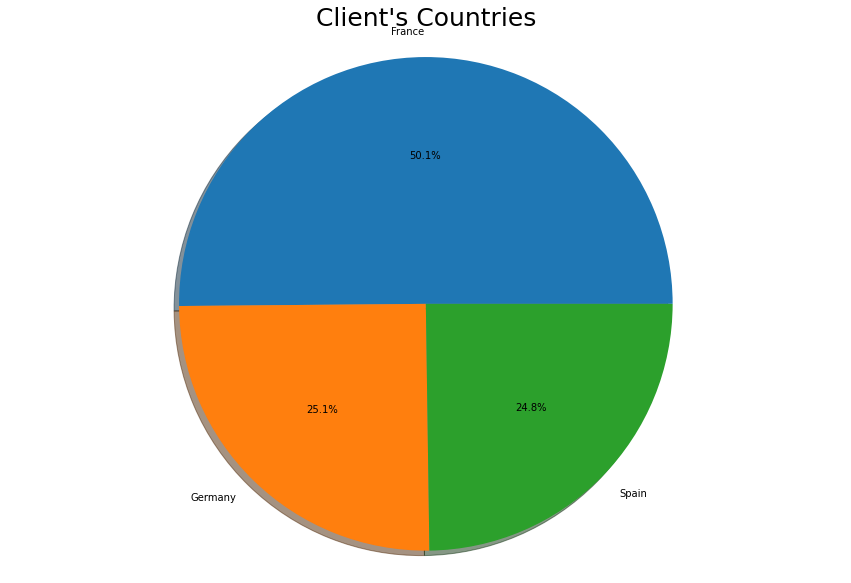

In [8]:
#to show percentages of people from each country in pie graph
fig, axs = plt.subplots(figsize=(15, 10))
sizes = [ds.Geography[ds['Geography']=='France'].count(), ds.Exited[ds['Geography']=='Germany'].count() , ds.Exited[ds['Geography']=='Spain'].count()]
axs.pie(sizes, labels=['France', 'Germany','Spain'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Client's Countries", size = 25)
plt.show()

In [9]:
#to check if any null value present in the dataset
pd.DataFrame(ds.isnull().sum(),columns=["Count"])

,Count
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


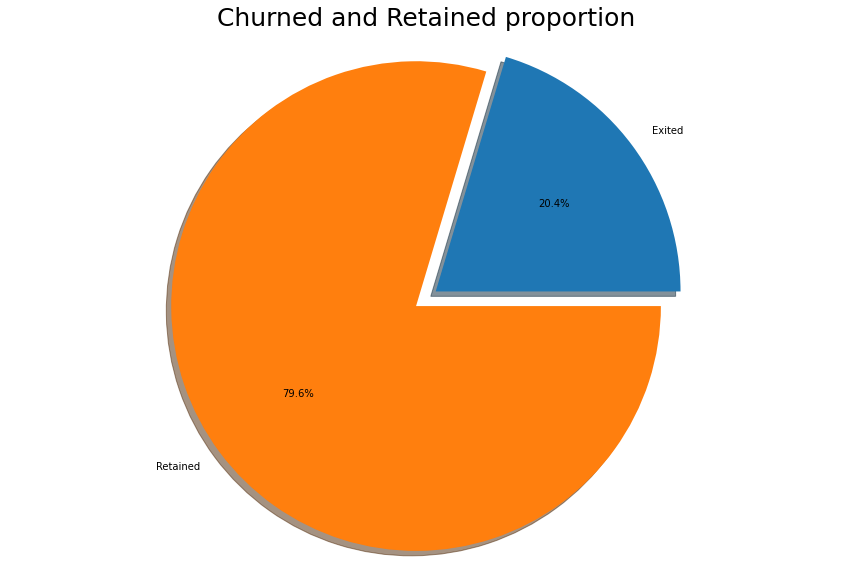

In [10]:
#to know percentages of valid customers who churned or not
fig, axs = plt.subplots(figsize=(15, 10))
sizes = [ds.Exited[ds['Exited']==1].count(), ds.Exited[ds['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Exited', 'Retained'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Churned and Retained proportion", size = 25)
plt.show()

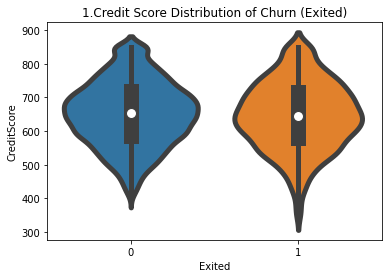

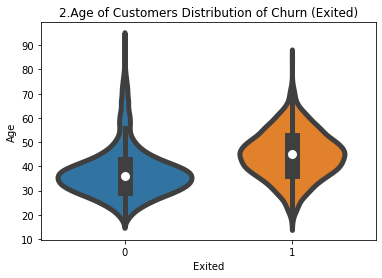

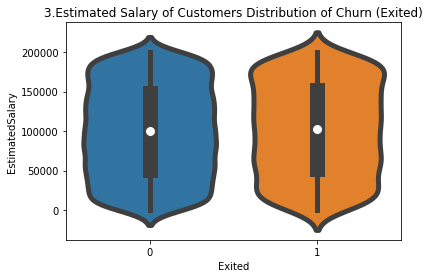

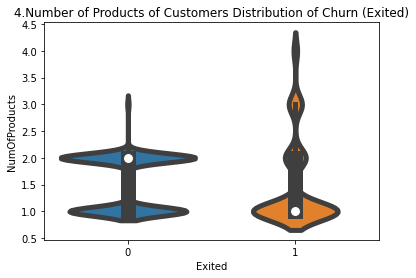

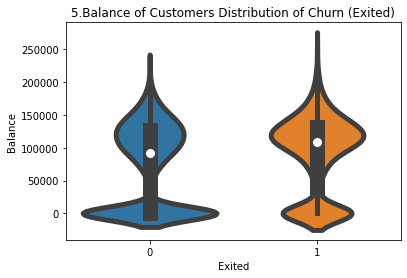

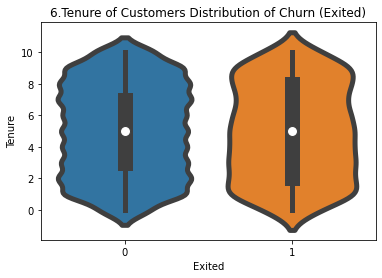

In [14]:
#credit score distribution between customers who churned and who didnt
sns.violinplot( x=ds["Exited"], y=ds["CreditScore"], linewidth=5)
plt.title("1.Credit Score Distribution of Churn (Exited)")
plt.show()
#credit score distribution between customers' age
sns.violinplot( x=ds["Exited"], y=ds["Age"], linewidth=5)
plt.title("2.Age of Customers Distribution of Churn (Exited)")
plt.show()
sns.violinplot( x=ds["Exited"], y=ds["EstimatedSalary"], linewidth=5)
plt.title("3.Estimated Salary of Customers Distribution of Churn (Exited)")
plt.show()
sns.violinplot( x=ds["Exited"], y=ds["NumOfProducts"], linewidth=5)
plt.title("4.Number of Products of Customers Distribution of Churn (Exited)")
plt.show()
sns.violinplot( x=ds["Exited"], y=ds["Balance"], linewidth=5)
plt.title("5.Balance of Customers Distribution of Churn (Exited)")
plt.show()
sns.violinplot( x=ds["Exited"], y=ds["Tenure"], linewidth=5)
plt.title("6.Tenure of Customers Distribution of Churn (Exited)")
plt.show()

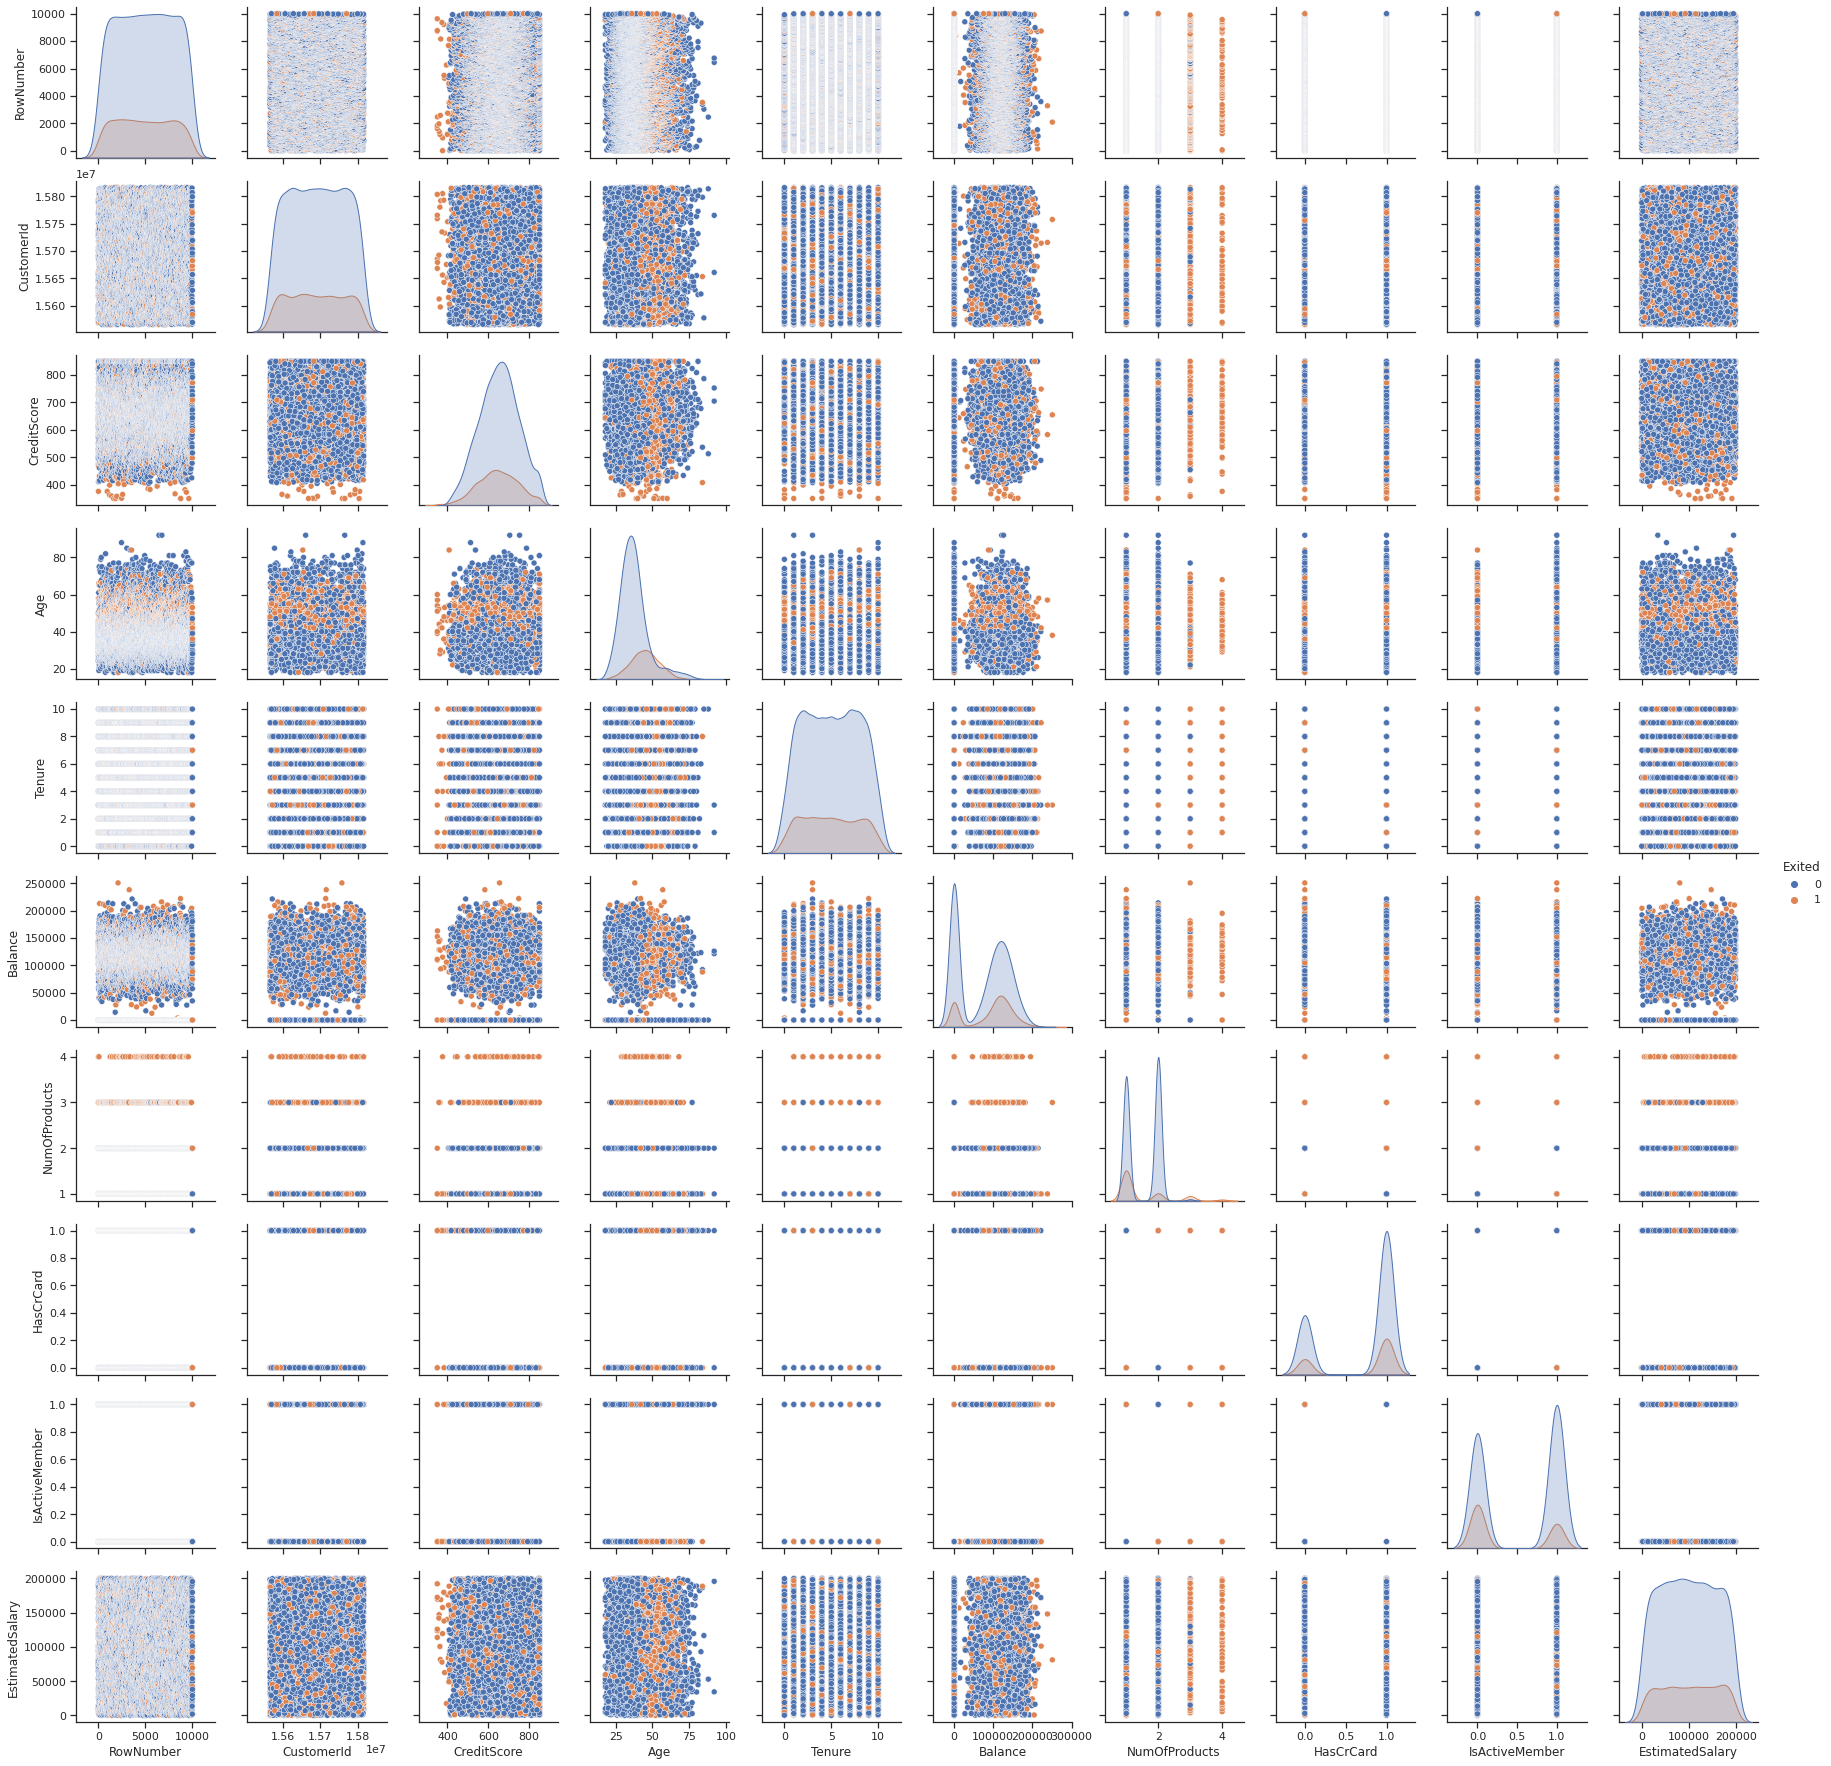

In [16]:
# Visualize the data using seaborn Pairplots
sns.set(style='ticks')
sns.pairplot(ds,hue = 'Exited', diag_kws={'bw': 0.2})

In [17]:
#Removing unneeded columns which are RowNumber, CustomerId and Surname
ds = ds.drop(columns=["RowNumber","CustomerId","Surname"])
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
X = ds.iloc[:,0:10] #predictor variable

y = ds.iloc[:,10:] #target variable

In [19]:
X.head()
#predicting variables are are all rest of the coloumns except churn column

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [20]:
y.head()
#the target variable is churn column as it is the main parameter for classification

,Exited
0,1
1,0
2,1
3,0
4,0


In [21]:
#converting data into a matrix form(array)
X = X.values
y = y.values

In [22]:
#converting string values to numerical values(array rep) because our models are numerical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [23]:
# transforming all the rows of the column 1  (geography) : so France -> 0, Germany -> 1, Spain -> 2
X[:,1] = label.fit_transform(X[:,1])

#transforming all the rows of the column  2 (gender) : so Female -> 0, male -> 1
X[:,2] = label.fit_transform(X[:,2])

In [24]:
X[0:10,:]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]], dtype=object)

In [25]:
#library which allows to encode a variable with n states on n bits
from sklearn.preprocessing import OneHotEncoder
#library which allows to apply transformations to the columns of an array
from sklearn.compose import ColumnTransformer

In [26]:
#x.shape before the bursting of the column (geography)
X.shape

(10000, 10)

In [27]:
# we want to transform the column 'Geography' having as index [1]
# we add the line remainder = 'passthrough' so that it does not forget to add the other columns which follow the column 'Geography'
ct = ColumnTransformer([('Geography',OneHotEncoder(),[1])],\
                         remainder = 'passthrough')

In [28]:
#line before transformation
# fitting = adjustment
X = ct.fit_transform(X)

In [29]:
# the number of column then becomes 12 = 10 + 2 (10 included 1 of the geography column)
X.shape

(10000, 12)

In [30]:
# we notice here that the column 'geograhy' adjusted and transformed has changed place (1st position)
# so so far we have 3 new columns that have been added
# however we will eliminate one because we have 3 values (france, spain, germany) we can use [00-01-10] instead of [100-010-001]
X[0:10,:]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [31]:
# so we eliminates the column one having index [0]
# we then display all the rows - and the columns starting from [1:]
X = X[:,1:]

In [32]:
X.shape

(10000, 11)

In [33]:
X[0:5,:]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [34]:
# display the names of the initial columns
ds.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [36]:
#divide our database into two parts: test and train (with balancing)
# with the train part => we will build our model based on one of the algorithms (DT, Knn, etc.)
# then we apply  this model on the part Test and compare the results of prediction generated with those of the test [Existed]
from sklearn.model_selection import train_test_split

#give the percentage of the test base 20% (test_size = 0.2)
# we set randon_state = 0: so that the learning and test base does not change during execution. Again, if we run on another machine we will get the same distribution
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,\
                                                random_state=0)

In [37]:
# Train base size
X_train.shape

(8000, 11)

In [38]:
#test base size 
X_test.shape

(2000, 11)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
#standarization of the values of the feature matrix

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [41]:
(667 - X_train[:,2].mean())/(X_train[:,2].std())

0.16958176236487257

In [42]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_sc,y_train)
y_pred_dtc = dtc.predict(X_test_sc)
from sklearn.metrics import accuracy_score
dtc_acc = accuracy_score(y_test,y_pred_dtc)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train_sc,y_train)
y_pred_logr = logr.predict(X_test_sc)
logr_acc = accuracy_score(y_test,y_pred_logr)

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( metric='minkowski')
knn.fit(X_train_sc,y_train)
y_pred_knn = knn.predict(X_test_sc)
knn_acc = accuracy_score(y_test,y_pred_knn)

# Random Forrest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_sc,y_train)
y_pred_rfc = rfc.predict(X_test_sc)
rfc_acc = accuracy_score(y_test,y_pred_rfc)

In [43]:
pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","K Neighbors Classifier","Random Forest"],
              "Scores":[dtc_acc,logr_acc,knn_acc,rfc_acc]})

,Algorithms,Scores
0,Decision Tree,0.8015
1,Logistic Regression,0.8110
2,K Neighbors Classifier,0.8270
3,Random Forest,0.8685


In [44]:
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turning kfold results
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_train_sc, y_train
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=10)
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "Accuracy Mean":results_mean,
                                "Accuracy":results_std})

,Algorithm,Accuracy Mean,Accuracy
0,LR,0.808375,0.008787
1,KNN,0.825750,0.006643
2,DTC,0.784375,0.015055
3,RFC,0.861375,0.010330


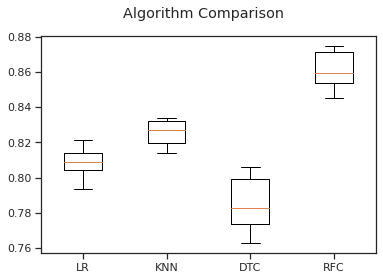

In [45]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.show()

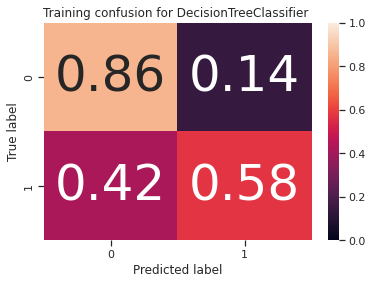

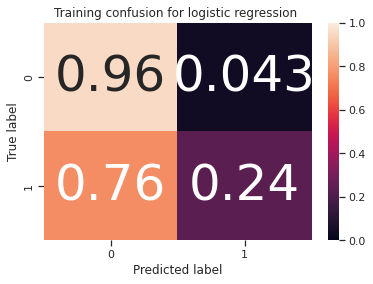

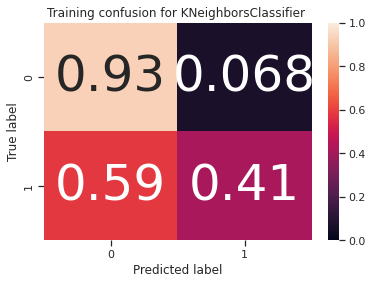

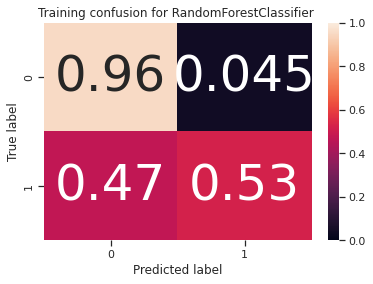

In [46]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
from sklearn.metrics import  confusion_matrix, r2_score
y_pred = dtc.predict(X_test_sc)

# Plotting Confusion Matrix of DecisionTreeClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for DecisionTreeClassifier ')
y_pred = logr.predict(X_test_sc)

# Plotting Confusion Matrix of logistic regression
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for logistic regression ')
y_pred = knn.predict(X_test_sc)

# Plotting Confusion Matrix of KNeighborsClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for KNeighborsClassifier ')
y_pred = rfc.predict(X_test_sc)

# Plotting Confusion Matrix of RandomForestClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for RandomForestClassifier ')


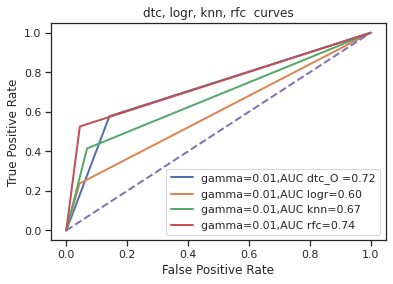

In [47]:
from sklearn import metrics

#fpr = False Positive Rate (taux des false positive)
#tpr = True Positive Rate (taux des true positive)
#thr = Permet la modification du seillage (Pas = [0.1] ou [0.2], etc..): cela est définie automatiquement par l'algorithme en fontion des matrices de confusion
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_dtc)
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_pred_logr)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_knn)
fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_pred_rfc)

#auc = aerea under cuve = plus que 'auc' soit  grande plus quelle soit élevée par rapport aux autres courbes
#la plus grande auc est constitue le meilleur algorithme
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
auc4 = metrics.auc(fpr4,tpr4)

#plot = affichage des informations explicatives sur la figure
plt.plot(fpr,tpr,'-',lw=2,label='gamma=0.01,AUC dtc_O =%.2f'%auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='gamma=0.01,AUC logr=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='gamma=0.01,AUC knn=%.2f'%auc3)
plt.plot(fpr4,tpr4,'-',lw=2,label='gamma=0.01,AUC rfc=%.2f'%auc4)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

#
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('dtc, logr, knn, rfc  curves')
plt.legend(loc='lower right')

In [48]:
# Grid search for Random Forest Classifier 
from sklearn.model_selection import GridSearchCV 
param_grid = { 
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4],
}
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, scoring='accuracy')
CV_dtc.fit(X_train_sc, y_train)
best_parameters = CV_dtc.best_params_
pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=["Best Parameters"])

,Best Parameters
max_leaf_nodes,23
min_samples_split,2


In [49]:
print("Best score is: ",CV_dtc.best_score_)

Best score is:  0.86025


In [50]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model_dtc.sav'
joblib.dump(CV_dtc, filename)

['model_dtc.sav']